# Model Evaluation and Selection

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import utils
np.set_printoptions(precision=2)
tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(0)

In [14]:
data=np.loadtxt("./data/data_w3_ex1.csv",delimiter=",")
x=data[:,0]
y=data[:,1]

In [15]:
x
y

array([1651.  , 1691.82, 1732.63, 1773.45, 1814.27, 1855.08, 1895.9 ,
       1936.71, 1977.53, 2018.35, 2059.16, 2099.98, 2140.8 , 2181.61,
       2222.43, 2263.24, 2304.06, 2344.88, 2385.69, 2426.51, 2467.33,
       2508.14, 2548.96, 2589.78, 2630.59, 2671.41, 2712.22, 2753.04,
       2793.86, 2834.67, 2875.49, 2916.31, 2957.12, 2997.94, 3038.76,
       3079.57, 3120.39, 3161.2 , 3202.02, 3242.84, 3283.65, 3324.47,
       3365.29, 3406.1 , 3446.92, 3487.73, 3528.55, 3569.37, 3610.18,
       3651.  ])

array([432.65, 454.94, 471.53, 482.51, 468.36, 482.15, 540.02, 534.58,
       558.35, 566.42, 581.4 , 596.46, 596.71, 619.45, 616.58, 653.16,
       666.52, 670.59, 669.02, 678.91, 707.44, 710.76, 745.19, 729.85,
       743.8 , 738.2 , 772.95, 772.22, 784.21, 776.43, 804.78, 833.27,
       825.69, 821.05, 833.82, 833.06, 825.7 , 843.58, 869.4 , 851.5 ,
       863.18, 853.01, 877.16, 863.74, 874.67, 877.74, 874.11, 882.8 ,
       910.83, 897.42])

In [16]:
x=np.expand_dims(x,axis=1)
y=np.expand_dims(y,axis=1)
x
y

array([[1651.  ],
       [1691.82],
       [1732.63],
       [1773.45],
       [1814.27],
       [1855.08],
       [1895.9 ],
       [1936.71],
       [1977.53],
       [2018.35],
       [2059.16],
       [2099.98],
       [2140.8 ],
       [2181.61],
       [2222.43],
       [2263.24],
       [2304.06],
       [2344.88],
       [2385.69],
       [2426.51],
       [2467.33],
       [2508.14],
       [2548.96],
       [2589.78],
       [2630.59],
       [2671.41],
       [2712.22],
       [2753.04],
       [2793.86],
       [2834.67],
       [2875.49],
       [2916.31],
       [2957.12],
       [2997.94],
       [3038.76],
       [3079.57],
       [3120.39],
       [3161.2 ],
       [3202.02],
       [3242.84],
       [3283.65],
       [3324.47],
       [3365.29],
       [3406.1 ],
       [3446.92],
       [3487.73],
       [3528.55],
       [3569.37],
       [3610.18],
       [3651.  ]])

array([[432.65],
       [454.94],
       [471.53],
       [482.51],
       [468.36],
       [482.15],
       [540.02],
       [534.58],
       [558.35],
       [566.42],
       [581.4 ],
       [596.46],
       [596.71],
       [619.45],
       [616.58],
       [653.16],
       [666.52],
       [670.59],
       [669.02],
       [678.91],
       [707.44],
       [710.76],
       [745.19],
       [729.85],
       [743.8 ],
       [738.2 ],
       [772.95],
       [772.22],
       [784.21],
       [776.43],
       [804.78],
       [833.27],
       [825.69],
       [821.05],
       [833.82],
       [833.06],
       [825.7 ],
       [843.58],
       [869.4 ],
       [851.5 ],
       [863.18],
       [853.01],
       [877.16],
       [863.74],
       [874.67],
       [877.74],
       [874.11],
       [882.8 ],
       [910.83],
       [897.42]])

In [17]:
print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


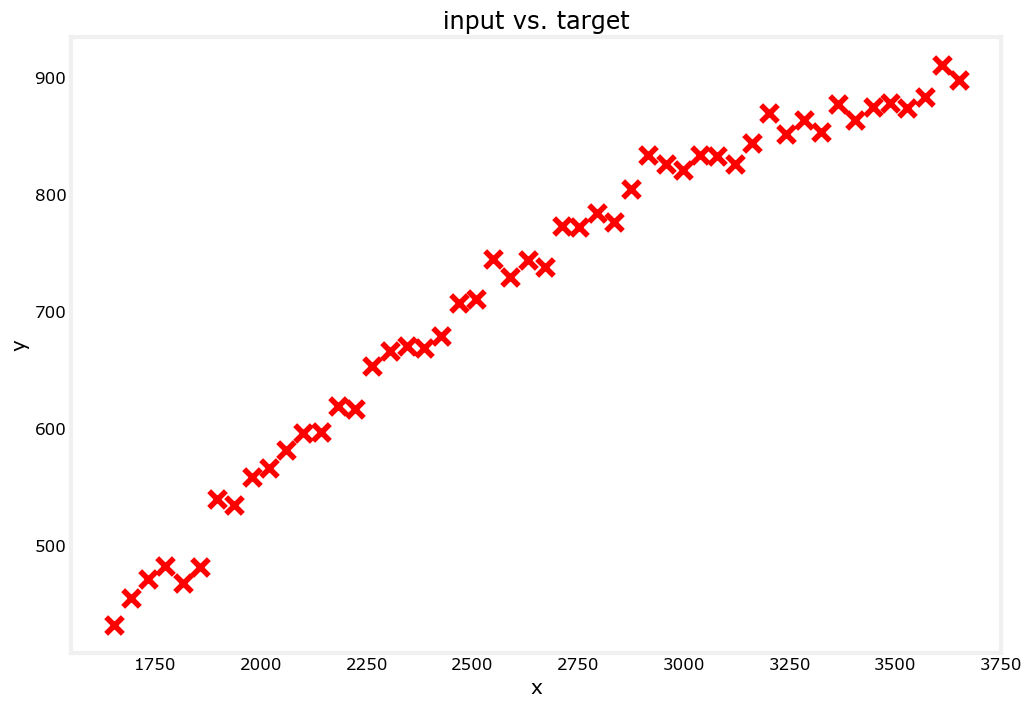

In [18]:
utils.plot_dataset(x,y,"input vs. target")

In [20]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)
del x_,y_

In [21]:
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


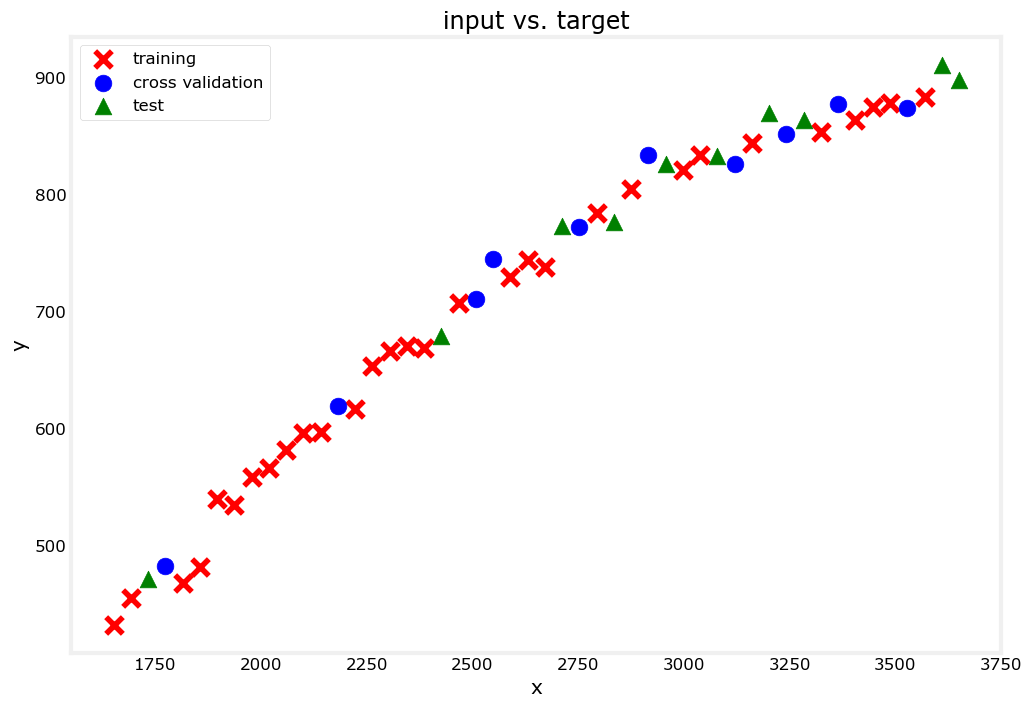

In [22]:
utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

In [23]:
scaler_linear=StandardScaler()
X_train_scaled=scaler_linear.fit_transform(x_train)

In [26]:
print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


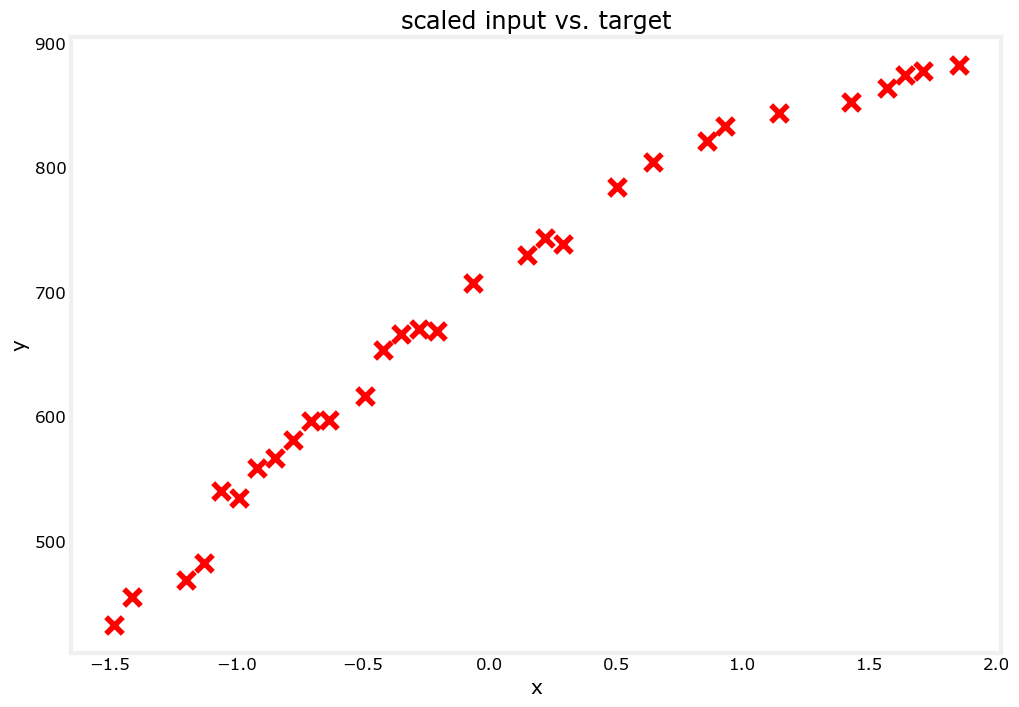

In [28]:
utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

In [29]:
linear_model=LinearRegression()
linear_model.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
y_hat=linear_model.predict(X_train_scaled)
print(f"training MSE using sklearn:",{mean_squared_error(y_train,y_hat)/2})

training MSE using sklearn: {406.19374192533127}


In [33]:
total_squared_error=0
for i in range(len(y_hat)):
    squared_error_i=(y_hat[i]-y_train[i])**2
    total_squared_error=total_squared_error+squared_error_i
mse=total_squared_error/(2*len(y_hat))
print(f"training MSE using for loop:{mse.squeeze()}")

training MSE using for loop:406.19374192533127


In [35]:
X_cv_scaled=scaler_linear.transform(x_cv)
print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85


In [36]:
yhat = linear_model.predict(X_cv_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 551.7789026952216


In [40]:
poly=PolynomialFeatures(degree=2,include_bias=False)
X_train_mapped=poly.fit_transform(x_train)

In [43]:
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


In [45]:
scaler_poly=StandardScaler()
X_train_mapped_scaled=scaler_poly.fit_transform(X_train_mapped)
X_train_mapped_scaled[:5]

array([[ 1.43,  1.47],
       [-0.28, -0.36],
       [ 1.71,  1.84],
       [ 0.22,  0.11],
       [ 0.15,  0.04]])

In [52]:
model=LinearRegression()
model.fit(X_train_mapped_scaled,y_train)
yhat=model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train,yhat)/2}")

LinearRegression()

Training MSE: 49.11160933402512


In [53]:
X_cv_mapped=poly.transform(x_cv)
X_cv_mapped_scaled=scaler_poly.transform(X_cv_mapped)
yhat=model.predict(X_cv_mapped_scaled)
print(f"CV MSE: {mean_squared_error(y_cv,yhat)/2}")

CV MSE: 87.69841211111911
